In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

sales = pd.read_csv('/Users/olivercorbisiero/downloads/sales.csv').set_index('Unnamed: 0')

In [2]:
sales['open'].value_counts()

1    532016
0    108824
Name: open, dtype: int64

In [3]:
sales['day_of_week'].value_counts()

5    92138
4    91972
2    91686
3    91651
6    91347
7    91075
1    90971
Name: day_of_week, dtype: int64

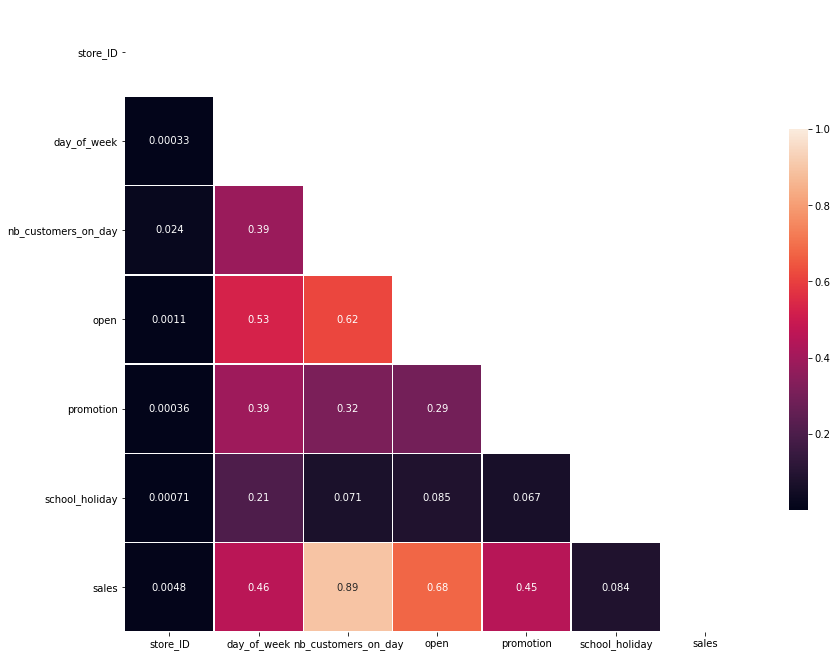

In [4]:
import matplotlib.pyplot as plt
import seaborn as sn

corr=np.abs(sales.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [5]:
#adding in week days vs weekends

sales['weekend'] = np.where(sales['day_of_week'] >= 6 ,1,0)

In [6]:
'''
#cleaning up dates
#sales['date'] = pd.to_datetime(sales['date'])
from datetime import datetime, date, time, timezone
def date_converter(date):
    return datetime.strptime(date, '%Y-%M-%d').to_ordinal()

sales['date'] = sales['date'].apply(date_converter)
'''

In [9]:
sales.dtypes

store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
weekend                         int64
day                             int64
month                           int64
year                            int64
dtype: object

In [7]:
from datetime import datetime
sales['date'] = pd.to_datetime(sales['date'])

sales["day"] = sales['date'].map(lambda x: x.day)
sales["month"] = sales['date'].map(lambda x: x.month)
sales["year"] = sales['date'].map(lambda x: x.year)
                                 

In [12]:
'''
sales['date'].dt.year.value_counts()

sales['date_2013'] = np.where(sales['date'].dt.year == 2013,1,0)
sales['date_2014'] = np.where(sales['date'].dt.year == 2014,1,0)
sales['date_2015'] = np.where(sales['date'].dt.year == 2015,1,0)
''''''

In [10]:
sales.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,weekend,day,month,year
Unnamed: 0,,,,,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,0,4422,0,18,4,2013
291687,394,6,2015-04-11,694,1,0,0,0,8297,1,11,4,2015
411278,807,4,2013-08-29,970,1,1,0,0,9729,0,29,8,2013
664714,802,2,2013-05-28,473,1,1,0,0,6513,0,28,5,2013
540835,726,4,2013-10-10,1068,1,1,0,0,10882,0,10,10,2013


In [10]:
len(sales)

640840

In [11]:
sales['state_holiday_a'] = np.where(sales['state_holiday'] == 'a',1,0)
sales['state_holiday_b'] = np.where(sales['state_holiday'] == 'b',1,0)
sales['state_holiday_c'] = np.where(sales['state_holiday'] == 'c',1,0)

In [12]:
len(sales)

640840

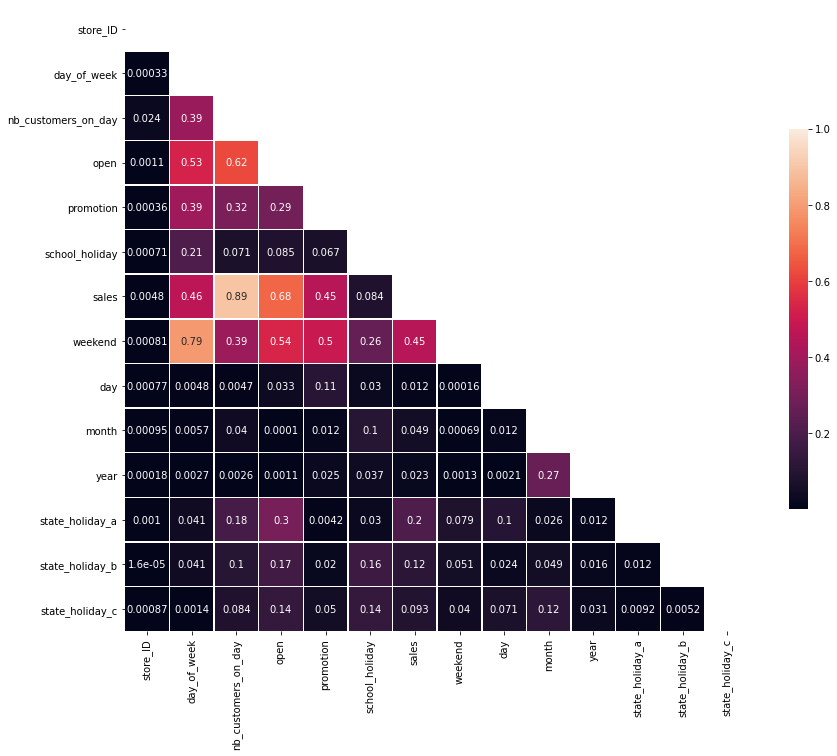

In [13]:
import matplotlib.pyplot as plt
import seaborn as sn

corr=np.abs(sales.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [14]:
sales.drop(labels=['state_holiday'],axis=1,inplace=True)

In [16]:
sales.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,sales,weekend,day,month,year,state_holiday_a,state_holiday_b,state_holiday_c
Unnamed: 0,,,,,,,,,,,,,,,
425390,366,4,2013-04-18,517,1,0,0,4422,0,18,4,2013,0,0,0
291687,394,6,2015-04-11,694,1,0,0,8297,1,11,4,2015,0,0,0
411278,807,4,2013-08-29,970,1,1,0,9729,0,29,8,2013,0,0,0
664714,802,2,2013-05-28,473,1,1,0,6513,0,28,5,2013,0,0,0
540835,726,4,2013-10-10,1068,1,1,0,10882,0,10,10,2013,0,0,0


In [17]:
sales.dtypes

store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
school_holiday                  int64
sales                           int64
weekend                         int64
day                             int64
month                           int64
year                            int64
state_holiday_a                 int64
state_holiday_b                 int64
state_holiday_c                 int64
dtype: object

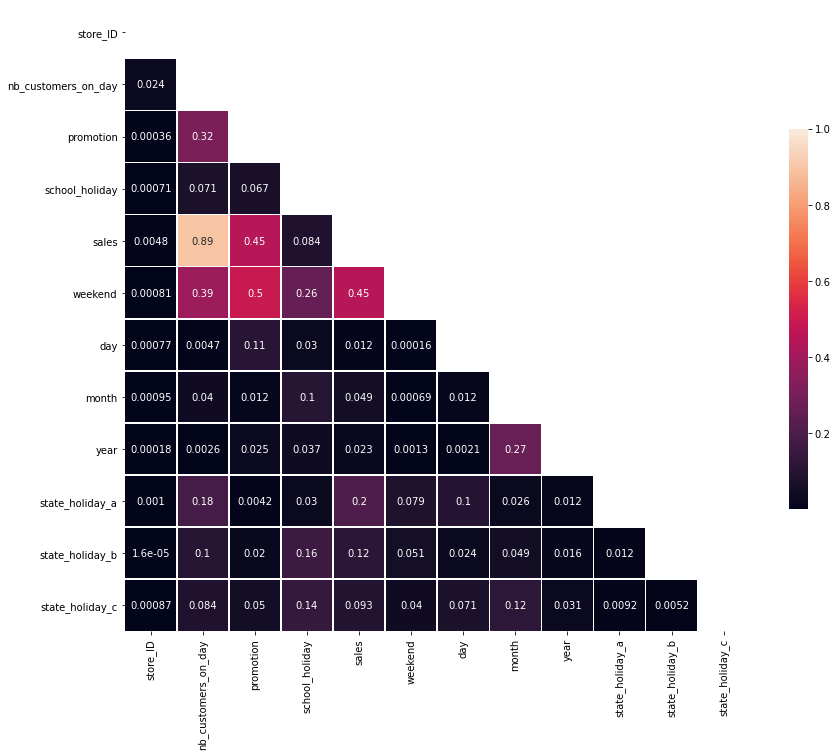

In [18]:
corr=np.abs(sales.drop(labels=['day_of_week','open'],axis=1).corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [29]:
X = sales[['store_ID','nb_customers_on_day','promotion','school_holiday','state_holiday_a',
         'state_holiday_b','state_holiday_c','weekend','year','month']]
y = sales['sales']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8433176476804132

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

1078.213774498242

In [33]:
np.sqrt(mean_squared_error(y_test,predictions))

1528.9878431071397

In [34]:
from sklearn.neighbors import KNeighborsRegressor

In [35]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8904679675355466

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=5, #gradient boosting always works with trees, no need to call the tree regressor
                                   n_estimators=100,
                                   random_state=1 # tastes like chicken
                                   )
gb_reg.fit(X_train, y_train)
gb_reg.score(X_test,y_test)



0.9077501922784001

In [40]:
gb_reg.score(X_train,y_train)

0.9077448933894936

In [ ]:
np.sqrt(mean_squared_error(y_test,gb_reg.predict(X_test)))

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=5, #gradient boosting always works with trees, no need to call the tree regressor
                                   n_estimators=100,
                                   random_state=1 # tastes like chicken
                                   )
gb_reg.fit(X_train, y_train)
print(gb_reg.score(X_test,y_test))
print(gb_reg.score(X_train,y_train))

0.9084788011029814
0.9084721099049659


In [85]:
cleaned_sales = sales[['store_ID','nb_customers_on_day','promotion','school_holiday','state_holiday_a',
         'state_holiday_b','state_holiday_c','weekend','year','month','sales']]


In [79]:
money = cleaned_sales[cleaned_sales['nb_customers_on_day']!=0]

,store_ID,nb_customers_on_day,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,weekend,year,month,sales
Unnamed: 0,,,,,,,,,,,


In [82]:
X = money.drop(labels='sales',axis=1)
y = money['sales']

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [84]:
import xgboost
xgb_c = xgboost.XGBRegressor()
xgb_c.fit(X_train, y_train)
print(xgb_c.score(X_train,y_train))
print(xgb_c.score(X_test,y_test))

0.9316304735690145
0.9276223138656404


In [118]:
test = cleaned_sales[cleaned_sales['nb_customers_on_day']==0]

In [120]:
xgb_c.predict(cleaned_sales['sales'])

ValueError: ('Expecting 2 dimensional numpy.ndarray, got: ', (640840,))

In [114]:
row = valid_dummy.loc[256945].to_frame().T
row.loc[row['nb_customers_on_day'] != 0]['nb_customers_on_day'].values

array([957])

In [121]:
valid_dummy = pd.read_csv('/Users/olivercorbisiero/downloads/sales.csv')

,store_ID,nb_customers_on_day,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,weekend,year,month
Unnamed: 0,,,,,,,,,,
425390,366,517,0,0,0,0,0,0,2013,4
291687,394,694,0,0,0,0,0,1,2015,4
411278,807,970,1,0,0,0,0,0,2013,8
664714,802,473,1,0,0,0,0,0,2013,5
540835,726,1068,1,0,0,0,0,0,2013,10
...,...,...,...,...,...,...,...,...,...,...
359783,409,483,0,0,0,0,0,1,2013,10
152315,97,987,1,0,0,0,0,0,2014,4
117952,987,925,0,0,0,0,0,0,2014,7


In [167]:
valid_dummy = cleaned_sales.drop(columns= 'sales')[0:10]

display(valid_dummy.head())


#display(valid_dummy[valid_dummy['nb_customers_on_day'] == 0])
#display(valid_dummy[valid_dummy['nb_customers_on_day'] != 0])

predict = []
'''
for i in list(valid_dummy.index):
    row = valid_dummy.loc[i].to_frame().T
    if row.loc[row['nb_customers_on_day'] == 0]['nb_customers_on_day'].values == np.array([0]):
        predict.append(0)
    else:
        predict.append(xgb_c.predict(row))
        
predict
'''

for row in valid_dummy.iterrows():
    #print(row[1])
    if row[1].values[1] == 0:
        predict.append(0)
    else:
        value = [row[1].values]
        col = list(row[1].index)
        df = pd.DataFrame(value,columns=col)
        predict.append(xgb_c.predict(df)[0])

predict

,store_ID,nb_customers_on_day,promotion,school_holiday,state_holiday_a,state_holiday_b,state_holiday_c,weekend,year,month
Unnamed: 0,,,,,,,,,,
425390,366,517,0,0,0,0,0,0,2013,4
291687,394,694,0,0,0,0,0,1,2015,4
411278,807,970,1,0,0,0,0,0,2013,8
664714,802,473,1,0,0,0,0,0,2013,5
540835,726,1068,1,0,0,0,0,0,2013,10


[4577.6353,
 8052.944,
 9780.001,
 5699.5967,
 9971.531,
 8788.848,
 0,
 10249.624,
 4909.4814,
 3411.401]

In [174]:
cleaned_sales['sales'][:10]

Unnamed: 0
425390     4422
291687     8297
411278     9729
664714     6513
540835    10882
687329     8406
600327        0
96265     11162
364435     5559
163146     3997
Name: sales, dtype: int64

In [173]:
pd.DataFrame(predict,index = valid_dummy.index)

,0
Unnamed: 0,
425390,4577.635254
291687,8052.943848
411278,9780.000977
664714,5699.596680
540835,9971.531250
687329,8788.847656
600327,0.000000
96265,10249.624023
364435,4909.481445


In [144]:
valid_dummy.iterrows()

<generator object DataFrame.iterrows at 0x141545820>

In [163]:
for row in valid_dummy.iterrows():
    value = [row[1].values]
    col = list(row[1].index)
    #df = pd.DataFrame(row[1].values,columns=list(row[1].index))

xgb_c.predict(pd.DataFrame(value, columns = col))[0]

5699.5967

In [43]:
from sklearn.model_selection import cross_validate
results = cross_validate(xgb_c,X, y, cv = 5,return_train_score=True)



In [44]:
results['test_score']

array([0.95673256, 0.95773907, 0.95738792, 0.95666378, 0.95718699])

In [45]:
results['train_score']

array([0.95802603, 0.95810993, 0.95879038, 0.95887805, 0.95858011])

In [49]:
test = X_test[X_test['nb_customers_on_day']==0]
xgb_c.predict(test)


array([ 792.6715  , -109.22183 ,  172.55185 , ...,   77.013985,
         20.797274, -179.69234 ], dtype=float32)

In [27]:
#overfitted
from sklearn.tree import DecisionTreeRegressor

# Create decision tree classifer object
model_sales = DecisionTreeRegressor()
# Train regression tree model
model_sales = model_sales.fit(X_train, y_train)
# Score the model  
print(model_sales.score(X_test, y_test))
#Prediction
y_pred = model_sales.predict(X_test)
print(model_sales.score(X_train, y_train))

0.8999431190524807
1.0


In [36]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10, 
                               max_depth=10, 
                               random_state=1) # fixing rand because I'm insecure and afraid you will judge me if I get a bad random selection that does not prove my point
forest = forest.fit(X_train, y_train)
print(forest.score(X_test,y_test))
print(forest.score(X_train,y_train))

0.8919096105027942
0.8922600250176982


In [35]:
forest.score(X_train,y_train)

0.8927796477089974

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

861.1735293624096

In [37]:
mean_absolute_error(y_test,y_pred)

475.4211646172732

In [ ]:
print(model_sales.score(X_train, y_train))

In [45]:
test = X_test[X_test['nb_customers_on_day']==0]

In [47]:
model_sales.predict(test)

ValueError: Number of features of the model must match the input. Model n_features is 11 and input n_features is 10 

In [52]:
from sklearn.model_selection import cross_validate

In [67]:
results = cross_validate(model_sales,X, y, cv = 10,return_train_score=True)

In [60]:
results['test_score']

array([0.96011534, 0.96034369, 0.96132708, 0.96127122, 0.95878239,
       0.96073903, 0.95950502, 0.95837112, 0.9600664 , 0.96043896])

array([0.99825787, 0.99832035, 0.99824454, 0.99824589, 0.99827027,
       0.99826366, 0.99829881, 0.99825574, 0.99827875, 0.99826385])

In [189]:
dummy = pd.read_csv('/Users/olivercorbisiero/downloads/validation_for students.csv').set_index('index')

In [190]:
dummy.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
index,,,,,,,,
272371,415,7,01/03/2015,0,0,0,0,0
558468,27,7,29/12/2013,0,0,0,0,0
76950,404,3,19/03/2014,657,1,1,0,0
77556,683,2,29/01/2013,862,1,0,0,0
456344,920,3,19/03/2014,591,1,1,0,0


In [191]:
dummy['weekend'] = np.where(dummy['day_of_week'] >= 6 ,1,0)

In [192]:
dummy['date'] = pd.to_datetime(dummy['date'])

dummy["day"] = dummy['date'].map(lambda x: x.day)
dummy["month"] = dummy['date'].map(lambda x: x.month)
dummy["year"] = dummy['date'].map(lambda x: x.year)
dummy['state_holiday_a'] = np.where(dummy['state_holiday'] == 'a',1,0)
dummy['state_holiday_b'] = np.where(dummy['state_holiday'] == 'b',1,0)
dummy['state_holiday_c'] = np.where(dummy['state_holiday'] == 'c',1,0)
dummy.drop(labels=['state_holiday'],axis=1,inplace=True)                   

In [193]:
dummy.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,school_holiday,weekend,day,month,year,state_holiday_a,state_holiday_b,state_holiday_c
index,,,,,,,,,,,,,,
272371,415,7,2015-01-03,0,0,0,0,1,3,1,2015,0,0,0
558468,27,7,2013-12-29,0,0,0,0,1,29,12,2013,0,0,0
76950,404,3,2014-03-19,657,1,1,0,0,19,3,2014,0,0,0
77556,683,2,2013-01-29,862,1,0,0,0,29,1,2013,0,0,0
456344,920,3,2014-03-19,591,1,1,0,0,19,3,2014,0,0,0


In [196]:
valid_dummy = dummy[['store_ID','nb_customers_on_day','promotion','school_holiday','state_holiday_a',
         'state_holiday_b','state_holiday_c','weekend','year','month']]

In [200]:
predict= []
for row in valid_dummy.iterrows():
    #print(row[1])
    if row[1].values[1] == 0:
        predict.append(0)
    else:
        value = [row[1].values]
        col = list(row[1].index)
        df = pd.DataFrame(value,columns=col)
        predict.append(xgb_c.predict(df)[0])

predict

[4577.6353,
 8052.944,
 9780.001,
 5699.5967,
 9971.531,
 8788.848,
 0,
 10249.624,
 4909.4814,
 3411.401,
 0,
 0,
 6565.4395,
 7992.1284,
 6193.21,
 4233.6055,
 3695.4846,
 7329.0913,
 0,
 7469.6504,
 7989.9395,
 4286.9385,
 0,
 7035.293,
 5924.242,
 5484.333,
 12902.936,
 5293.3853,
 4832.917,
 7103.2026,
 0,
 13088.893,
 5742.43,
 0,
 8464.813,
 0,
 6762.302,
 3018.6494,
 10094.049,
 0,
 6376.8237,
 0,
 10022.283,
 6636.2334,
 5323.7314,
 6687.6953,
 0,
 7519.0366,
 5931.9194,
 4618.989,
 10212.641,
 3384.3176,
 7203.061,
 3978.4536,
 3281.8066,
 8458.671,
 4938.356,
 7801.6313,
 8775.208,
 9376.44,
 7448.689,
 6162.789,
 5238.143,
 3149.0757,
 5591.4185,
 4991.8804,
 6351.995,
 5408.922,
 2914.9536,
 7412.726,
 4810.6226,
 7168.791,
 7874.562,
 10372.586,
 6225.722,
 5418.8,
 7269.5493,
 5923.374,
 6661.4653,
 6052.3447,
 5878.5615,
 3470.2422,
 5510.995,
 3090.329,
 7035.8496,
 4785.1807,
 3468.3306,
 7830.3896,
 0,
 7384.81,
 6420.189,
 2909.1267,
 6981.671,
 7317.625,
 9396.607,

In [203]:
len(predict)

71215

In [207]:
len(valid_dummy)

71205

In [211]:
opn = valid_dummy[valid_dummy['nb_customers_on_day']!=0]
close = valid_dummy[valid_dummy['nb_customers_on_day']==0]

In [218]:
pred = xgb_c.predict(opn)

pred_opn = pd.DataFrame(pred,index=opn.index)
pred_close = pd.DataFrame([0]*len(close),index=close.index)


In [219]:
pred_opn

,0
index,
76950,6565.439453
77556,7992.128418
456344,6193.209961
436466,4233.605469
646251,3695.484619
...,...
63935,6047.233398
492885,4019.482666
207393,5830.279785


In [236]:
validation_test = pd.concat([pred_opn,pred_close])

In [237]:
validation_test

,0
index,
76950,6565.439453
77556,7992.128418
456344,6193.209961
436466,4233.605469
646251,3695.484619
...,...
587208,0.000000
138958,0.000000
620934,0.000000


In [227]:
import pickle
pickle.dump(xgb_c,open('/Users/olivercorbisiero/documents/module-3/IronKaggle/Andrea_Ollie_xgb.p','wb'))

In [238]:
pickle.dump(validation_test,open('/Users/olivercorbisiero/documents/module-3/IronKaggle/Andrea_Ollie_predictions.p','wb'))